# Introduction to Web Scraping

This tutorial covers some basic concepts of web scraping. In all the tutorials before, the datasets that you had to work with were provided by us. Sometimes, it's easy to directly download these datasets from some websites. But some annoying websites do not make it that easy for you! For instance, in the first tutorial, the Moons_and_planets.csv file was parsed from this Wikipedia page https://en.wikipedia.org/wiki/List_of_natural_satellites where there is no option to directly download the dataset :(
In such instances, we use web scraping. It is a technique for extracting data from websites and storing it in a file on your computer. <br>

First, let's go through what makes up a web page. When we visit a webpage, our browser sends a request to the web server called a **GET**
request(because we are requesting the server to send us files). The server then sends back files that tells our browser what the website looks like. These files are of different types : 

1. HTML :  Has the main contents of the page 
2. CSS : Used to "style" the webpage and make it look good
3. JS : Javascript files make the webpage more interactive
4. Images : Helps add images to the webpage

For our purposes, we need only concern ourselves with HTML, but you are free to look up the others. 

## Basics of HTML

HTML is not a programming language, it is a <i>markup language</i>, which means it tells the browser what the layout of the website looks like. It lets you do things like make a new heading, a new paragraph, make text bold, italicise text etc. HTML consists of elements called **tags** which basically gives the browser instructions like "the following text is meant to be bold" or "the following text is another paragraph". The most basic tag is the `<html>` tag. People who are already familiar with HTML can skip this section and move on to the actual web scraping part.

In [ ]:
%%HTML
<html>

</html>

This tells the browser that everything inside these two tags is HTML code. Ignore the first line, that is not part of an HTML file.

In [ ]:
%%HTML
<!-- This is how we comment in HTML :D  -->

Given below are some common HTML tags.
<l>
    <li>`<head>` tag : Contains information about the title of the page</li>
    <li>`<body>` tag : Contains information about the contents of the web page</li>
    <li>`<p>` tag : Starts a new paragraph </li>
    <li>`<a>` tag : Used to insert links in the webpage. The `href` property of this tag determines where the link goes. </li> 
</l> 
Run the code cell to see how HTML formats the page using these tags!

In [ ]:
%%HTML  
<html>   

    <head>                                    
        This is <i>really</i> neat!           <!-- i tag : italics -->
    </head>
    
    <body>                                    
    
        <p>
        <b>This is <i>really</i> neat!</b>
        </p>                                  <!-- b tag : bold -->
                
        <p>        
        <a href = "https://www.tech-iitb.org/krittika/">
        Krittika, the Astronomy Club of IIT Bombay </a>  
        </p>
    </body>
    
</html>

A tag is called a <b>child</b> tag when it is inside another tag. Similarly, the enclosing tag is called the <b>parent</b> tag. A tag is the <b>sibling</b> of another tag if it is enclosed inside the same parent tag. In the above example, the two p tags are the children of the body tag and are sibling tags, while the body tag is a parent tag for these two.<br>

Some other very common HTML tags are `<div>`(helps in dividing the webpage into different areas), `<table>`(creates a table) and `<form>`(creates an input form). Refer to [this](https://developer.mozilla.org/en-US/docs/Web/HTML/Element) for a more detailed discussion on HTML tags.<br>

One last important concept in HTML are the `class` and `id` properties. These are used to give HTML elements names, and they make it easier for us while web scraping. A single element can have multiple classes and a class can also be shared among multiple elements. However, an id is unique to an HTML element and cannot be used more than once in a single webpage. 

In [ ]:
%%HTML
<html>   

    <head>                                    
        This is <i>really</i> neat!           
    </head>
    
    <body>                                    
    
        <p class = "neat">                     <!-- This 'p' tag is part of 1 class-->
        <b>This is <i>really</i> neat!</b>
        </p>                                  
                
        <p class = "neat very-neat">            <!--This 'p' tag is part of 2 classes-->    
        <a href = "https://www.tech-iitb.org/krittika/" id="very-very-neat">
        Krittika, the Astronomy Club of IIT Bombay </a>  
        </p>
    </body>
    
</html>

As can be seen, adding classes and ids do not change the website's layout.

## Using the  requests Library

To scrape a webpage, we first download the HTML contents of the page and the **requests** library in Python lets us do that. There are different types of requests that we can send to the webpage, but here we will be using the `GET` request. Let's scrape a very simple webpage we have created [here](https://fathimazarin.github.io/simple.html).

In [ ]:
import requests
page = requests.get("https://fathimazarin.github.io/simple.html")
page

If you run the above code and get a response code of 200, it means that your page downloaded successfully, while codes starting with a 4 or a 5 indicates an error.

In [ ]:
page.content

This command prints out the HTML code of the page. 

## Using the BeautifulSoup library

BeautifulSoup is a Python library that lets us parse HTML and extract whatever text that we want from it. This code loads the BeautifulSoup library and creates an instance of the BeautifulSoup class(we will be discussing classes in a later tutorial). This code uses the HTML parser(used generally for HTML documents that aren't well-formed, our example in this case :P )

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

As you can see above, the HTML code was printed out in a very messy way when we used page.content . The following command can be used to format the code in a better way.

In [ ]:
print(soup.prettify())

Now, the information that we would want to extract is most probably inside the body tag in a <i>p</i> tag(the paragraph tags) or inside a table tag etc. The BeautifulSoup library has functions that help you directly search for these tags in the HTML code.

In [ ]:
soup.find('p') #What datatype does it return?

You might have realized that the HTML code given above has multiple <i>p</i> tags, yet it returned only the first one. The soup.find_all() function returns a list of all occurrences of that particular tag.

In [ ]:
soup.find_all('p') 

But this still returns HTML code with pesky HTML tags that you dont want in your parsed file. The get_text() function will help you out here. You cannot use the get_text() function on the list returned by find_all(). You will have to access each element and use the function.

In [ ]:
soup.find_all('p')[0].get_text()

In [ ]:
soup.find_all('p')[1].get_text()

In [ ]:
print(soup.find_all('p')[1].get_text())     #Why do you think there is a difference in output ?

In [ ]:
krittika=soup.find_all('p')[1]
krittika

In [ ]:
krittika.find_all('a')  #The find_all() function can also be used to search for tags inside a parent tag

In [ ]:
krittika.find_all('a')[0]

In [ ]:
krittika.find_all('a')[0].get_text()

You still would not want those \n cluttering up your file.

In [ ]:
soup.find_all('p')[1].get_text().replace('\n','')  #What do you think this code does?

## Searching by class and id
Adding one argument to the find_all() function helps you search by class and id.

In [ ]:
soup.find_all('p', attrs={"class":"neat"})

In [ ]:
soup.find_all('p',attrs={"class":"very-neat"})

In [ ]:
soup.find_all(id="very-very-neat")

## Moving on to actual webpages

In the above example, we parsed a relatively simple file with few lines of code, while that is not the case for real life websites(Go to any random webpage on Google Chrome or Firefox and press Ctrl+u and check for yourself). It will be hard to find the exact location of the paragraph or the tag that you want in such a big code. In such scenarios, the concept of class and id that we discussed above becomes useful. Web scraping is all about finding the right tag to search for using the find() function. <br>

Let us try scraping a much more longer webpage, say, a Wikipedia page [here](https://en.wikipedia.org/wiki/Lists_of_stars_by_constellation) to print the list of constellations. The constellations are listed as an unordered list, hence they can be found inside `<li></li>` tags(these tags are responsible for the bullets).

In [ ]:
page = requests.get("https://en.wikipedia.org/wiki/Lists_of_stars_by_constellation")
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
soup.find_all('li')

You can see that the list of constellations that we want starts from the 6th element in the above list and there are 88 constellations in total. Let us try printing it out.

In [ ]:
print(soup.find_all('li')[5].get_text())
print(soup.find_all('li')[6].get_text())
constellations=[]
for element in soup.find_all('li')[5:93]:    #How 93?
    constellations.append(element.get_text())
    
print(constellations)

## One final lesson in web scraping
Not all website owners would appreciate a random person parsing through their website and collecting data. There are serious ethical concerns related to web scraping and you should always make sure before doing it that the owner is okay with this. In this tutorial, we have used only Wikipedia pages where web scraping is always allowed :)

If you have understood so far, you are good to go! You must have realized how annoying it is to open the website, see how it is formatted, check if there are any errors, find the tag which contains your data etc. So for today's assignment, you will be given the code to parse the data and format it. The corresponding functions will be explained and you can use them directly in your code. <br>
## Your assignment...
...should you choose to accept it will be the following:
1. Parse [this](https://en.wikipedia.org/wiki/Lists_of_stars_by_constellation) webpage for the RA and Dec of stars of each constellation, convert these coordinates to Cartesian coordinates and store them by constellation and plot them using matplotlib.
2. Try to recreate the 'Moons_and_planets.csv' file(used in the first tutorial) from [this](https://en.wikipedia.org/wiki/List_of_natural_satellites) webpage. You can take inspiration from how tables are scraped in the get_map() function for Task 1. Do remember to remove commas and uncertainties in the radius measurement.

You can use the following code in Task 1. The data in https://en.wikipedia.org/wiki/Lists_of_stars_by_constellation is not well-formatted and these functions will help in that.
**The useful data to be extracted in Task 1 and Task 2 are stored in a HTML table under the class 'wikitable sortable' and you can directly search by class for both tasks.**

In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
def get_coords(ra_s, dec_s):
    h_ind = ra_s.find('h')
    m_ind = ra_s.find('m')
    s_ind = ra_s.find('s')    
    h = float(ra_s[:h_ind])
    m = float(ra_s[(h_ind+1):m_ind])
    s = float(ra_s[(m_ind+1):s_ind])
    ra = h + m/60 + s/3600
    if dec_s[0] == '+':
        sign = 1
    else:
        sign = -1
    d_ind = dec_s.find('°')
    m_ind = dec_s.find('′')
    s_ind = dec_s.find('″')
    d = float(dec_s[1:d_ind])
    m = float(dec_s[(d_ind+1):m_ind])
    s = float(dec_s[(m_ind+1):s_ind])
    dec = sign*(d + m/60 + s/3600)
    return ra, dec

The get_coords() function is used to format the RA and Dec information of each star. Right Ascension is similar to longitude and is measured in hours, minutes, seconds while Declination is similar to latitude and is measured in degrees, minutes, seconds. The code parses data from the website as a string. This function converts the string to float and then returns the RA as hours and Declination as degrees.

In [ ]:
def get_map(constellation):
    url = f'https://en.wikipedia.org/wiki/List_of_stars_in_{constellation}' #page gets downloaded according to constellation
    r = requests.get(url)

    soup = BeautifulSoup(r.content, 'lxml')  #Here, the lxml parser is used instead of HTML parser

    tab = soup.find_all('table', attrs={'class':'wikitable sortable'})[0]   #To extract information from a wikipedia table
                               
    data = [[]]
    for i in tab.find_all('tr'):   #searching in each row of the table ( 'tr' tag stands for row)
        row = []                    #declaring empty row
        for j in i.find_all('td'):  #'td' tag stands for a cell
            row.append(j.get_text())   #add the text contents of each row to the list
        data.append(row)

    heads = []
    for i in tab.find_all('tr')[:1]:
        for j in i.find_all('th'):             #'th' tag stands for header cell
            heads.append(j.get_text().strip('\n'))

    name_ind = heads.index('Name')
    ra_ind = heads.index('RA')
    dec_ind = heads.index('Dec')
                                  
    mag_ind = heads.index('abs.mag.')
    
    name = []
    ra = []
    dec = []
    mag = []
    for i in data[2:-2]:
        name_string = i[name_ind]
        try:                                             #The code first tries to run the code inside try
            ra_string = i[ra_ind].replace('\xa0', '')
            dec_string = i[dec_ind].replace('\xa0', '')   #These are code used to format the data
            mag_string = i[mag_ind]                       
            if mag_string[0]=='−':
                mag_string = '-'+mag_string[1:]
        except:                                       #If any error gets thrown up, it will execute the code inside except
            continue
        try:
            ra_i, dec_i = get_coords(ra_string, dec_string)     #convert ra dec from string to float
        except:
            continue
        try:
            mag.append(float(mag_string))
            name.append(name_string)
            ra.append(ra_i)
            dec.append(dec_i)
        except:
            continue

    name = np.array(name)
    ra = np.array(ra)
    dec = np.array(dec)
    mag = np.array(mag)
    return name, ra, dec, mag

The function get_map() returns a numpy array of name of the stars in that particular constellation, the formatted RA, Dec coordinates for each star in hours and degrees respectively and the [apparent magnitudes](https://en.wikipedia.org/wiki/Apparent_magnitude). You might have noticed the use of `try` and `except` in the above code. These commands are used to handle errors while executing. The interpreter will first try to execute the code inside `try`. If an error gets thrown up during that execution(for instance, incorrect formatting), the code inside `except` will get executed. This makes sure that any star with any formatting errors in its data will be skipped. A more accurate function which does not skip such stars will be given in the solutions of this tutorial for anyone who wants a better method.<br>
The lxml parser has been used in the above function. Different parsers give different results and you should always use the parser that works for you. lxml is one of the fastest parsers available.<br>

For the next step, you will need to write a function that takes in the celestial coordinates(RA, Dec) and returns its projections into a Cartesian space. This is called a **[Stereographic projection](https://en.wikipedia.org/wiki/Stereographic_projection)**, where points on a sphere are projected on to a plane. A hint to approach this would be to first convert RA, Dec to spherical coordinates on a unit sphere and then apply stereographic projection formulae. <br>

To plot the final figure, write a function plot() that takes in a constellation name and plots it. The size of the star must be proportional to its brightness or flux. In tutorial 2, there was a discussion on Magnitudes in Astronomy and its relation to flux, which might prove useful here. Do normalize the size values before using them. If the points come out too small, you can scale the size appropriately.

# Solutions to Tutorial 6


These may not be the "best" solution to the given questions, it is just one of the many solutions possible.

## Task 1 :

In [7]:
import requests
from bs4 import BeautifulSoup

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def get_coords(ra_s, dec_s):
    h = float(ra_s[:2])
    m = float(ra_s[3:5])
    s = float(ra_s[7:-1])
    ra = h + m/60 + s/3600
    if dec_s[0] == '+':
        sign = 1
    else:
        sign = -1
    d = float(dec_s[1:3])
    m = float(dec_s[4:6])
    s = float(dec_s[7:-1])
    dec = sign*(d + m/60 + s/3600)
    return ra, dec

In [22]:
def get_map(constellation):           #The get_map() that does not skip stars
    url = f'https://en.wikipedia.org/wiki/List_of_stars_in_{constellation}'
    r = requests.get(url)

    soup = BeautifulSoup(r.content, 'lxml')

    tab = soup.find_all('table', attrs={'class':'wikitable sortable'})[0]

    data = [[]]
    for i in tab.find_all('tr'):
        row = []
        for j in i.find_all('td'):
            row.append(j.get_text())
        data.append(row)

    heads = []
    for i in tab.find_all('tr')[:1]:
        for j in i.find_all('th'):
            heads.append(j.get_text().strip('\n'))

    name_ind = heads.index('Name')
    ra_ind = heads.index('RA')
    dec_ind = heads.index('Dec')

    mag_ind = heads.index('vis.mag.')

    name = []
    ra = []
    dec = []
    mag = []
    for i in data[2:-2]:
        name_string = i[name_ind]
        
        if i[ra_ind] != '' and i[dec_ind] != '' and i[mag_ind] != '' and i[ra_ind] != ' ' and i[dec_ind] != ' ' and i[mag_ind] != ' ' and i[mag_ind][0] != 'n':
            ra_string = i[ra_ind].replace('\xa0', '')
            dec_string = i[dec_ind].replace('\xa0', '')
            mag_string = i[mag_ind]
            if mag_string[0]=='−':
                mag_string = '-'+mag_string[1:]
            if mag_string[0]=='~':
                mag_string = mag_string[1:]
            mag_str = mag_string[0]
            for c in mag_string[1:]:
                if ord(c) > 45 and ord(c) < 59:
                    mag_str += c
                else:
                    break
            i = mag_string.find('.')
            mag_string = mag_string[:(i+3)]
                                
            ra_i, dec_i = get_coords(ra_string, dec_string)
            mag.append(float(mag_str))
            name.append(name_string)
            ra.append(ra_i)
            dec.append(dec_i)

    name = np.array(name)
    ra = np.array(ra)
    dec = np.array(dec)
    mag = np.array(mag)
    return name, ra, dec, mag

In [23]:
def project(ra, dec): # Stereographic Projection. 
    theta = np.deg2rad(90-dec + dec.mean())
    phi = np.deg2rad((ra-ra.mean())*15)
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    X = x/(1-z)
    Y = y/(1-z)
    return X,Y

In [24]:
def plot(constellation, return_data = False, orientation=0, norm=50, **kwargs):
    name, ra, dec, mag = get_map(constellation)
    x, y = project(ra, dec)
    s = 10**(-mag/2.5)
    if norm!=None:
        s = s/s.max()*norm
    if 'figure' not in kwargs:
        plt.figure(figsize=(10,10))
    plt.gca().set_facecolor('k')
    if 'color' not in kwargs:
        kwargs['color'] = 'w'
    if orientation == 0:
        plt.scatter(x, y, s=s, **kwargs)
    elif orientation == 1:
        plt.scatter(-y, x, s=s, **kwargs)
    elif orientation == 2:
        plt.scatter(-x, -y, s=s, **kwargs)
    elif orientation == 3:
        plt.scatter(y, -x, s=s, **kwargs)
    plt.xticks([])
    plt.yticks([])
    if return_data:
        return name, ra, dec, mag, s

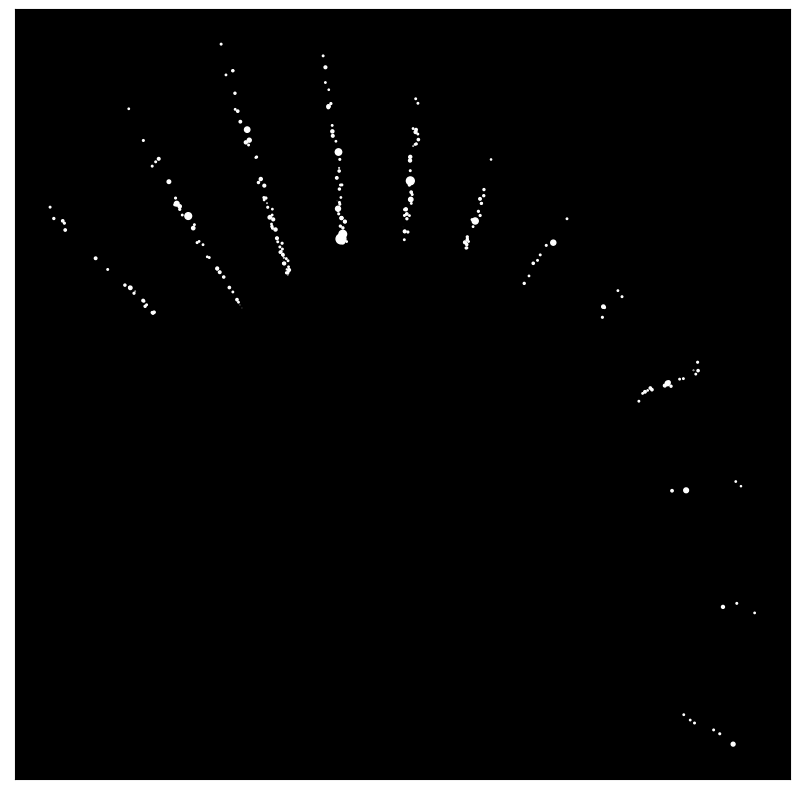

In [25]:
plot('Draco',orientation=1)

## Task 2 :

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_natural_satellites")
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
table=soup.find_all('table',attrs={'class':'wikitable sortable'})[0]
table

In [ ]:
    data = [[]]
    for i in table.find_all('tr'):  #'tr' tag used to access rows
        row = []
        for j in i.find_all('td'):  #'td' tag used to acccess elements
            row.append(j.get_text().replace(',',''))  #commas removed to enable conversion of string to float
        data.append(row)

    heads = []
    for i in table.find_all('tr')[:1]:
        for j in i.find_all('th'):   #'th' used to access headers
            heads.append(j.get_text().strip('\n'))

In [ ]:
heads

In [ ]:
data

In [ ]:
final_data=[[]]
for moon in data:
    if moon!=[]:
        final_data.append([moon[3],moon[1],moon[4]])

final_data[0]=["Name of moon","Name of planet","Mean radius(km)"]   
final_data

Now, to remove the uncertainty in the radius measurements:

In [ ]:
for moon in final_data[1:-1]:
    moon[2]=moon[2].split('±')[0] 

In [ ]:
final_data